In [111]:
#import libraries for data analysis
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datetime import datetime
import string

#libraries for visualisations and tables
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from IPython.display import set_matplotlib_formats

In [112]:
#dataset of all recent Tweets with the hashtag #srilanka for the crisis ongoing
#loading the dataset using pandas
df = pd.read_csv("SriLankaTweets.csv")
df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1546235784730230785,1546089912042127362,1.657486e+12,2022-07-10 20:51:53,0,NaN,@MrJonasDanner Das geht doch seit Beginn der B...,de,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MrJonasDanner', 'name': 'Jon...",NaN,NaN,NaN,NaN
1,1,1546235779906781186,1546235779906781186,1.657486e+12,2022-07-10 20:51:52,0,NaN,Artículo lúcido y bien informado sobre la cris...,es,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1546235777633468416,1546235777633468416,1.657486e+12,2022-07-10 20:51:51,0,NaN,En argentina y después de lo de Sri Lanka la g...,es,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1546235770582847496,1546185673593524225,1.657486e+12,2022-07-10 20:51:50,0,NaN,@Haqeeqat_TV Ab na daro aur sikho in Sri lank...,hi,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Haqeeqat_TV', 'name': 'Haqee...",NaN,NaN,NaN,NaN
4,4,1546235754342498308,1546235754342498308,1.657486e+12,2022-07-10 20:51:46,0,NaN,Resigned or Arrested? 1. Sri Lanka's presiden...,et,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Identify Date Range

In [113]:
#to verify time period: convert to date-time
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

#extract date from datetime objects
df['Date'] = df['date'].dt.date
df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Date
0,0,1546235784730230785,1546089912042127362,1.657486e+12,2022-07-10 20:51:53,0,NaN,@MrJonasDanner Das geht doch seit Beginn der B...,de,[],...,NaN,NaN,NaN,NaN,"[{'screen_name': 'MrJonasDanner', 'name': 'Jon...",NaN,NaN,NaN,NaN,2022-07-10
1,1,1546235779906781186,1546235779906781186,1.657486e+12,2022-07-10 20:51:52,0,NaN,Artículo lúcido y bien informado sobre la cris...,es,[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2022-07-10
2,2,1546235777633468416,1546235777633468416,1.657486e+12,2022-07-10 20:51:51,0,NaN,En argentina y después de lo de Sri Lanka la g...,es,[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2022-07-10
3,3,1546235770582847496,1546185673593524225,1.657486e+12,2022-07-10 20:51:50,0,NaN,@Haqeeqat_TV Ab na daro aur sikho in Sri lank...,hi,[],...,NaN,NaN,NaN,NaN,"[{'screen_name': 'Haqeeqat_TV', 'name': 'Haqee...",NaN,NaN,NaN,NaN,2022-07-10
4,4,1546235754342498308,1546235754342498308,1.657486e+12,2022-07-10 20:51:46,0,NaN,Resigned or Arrested? 1. Sri Lanka's presiden...,et,[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2022-07-10


In [114]:
#check data date range:
lowest_date = df['Date'].min()
highest_date = df['Date'].max()

print("Lowest Date:", lowest_date)
print("Highest Date:", highest_date)

Lowest Date: 2022-07-10
Highest Date: 2022-07-10


Create sub-dataframe for Sentiment Analysis of Tweets

In [115]:
#new df with selected columns
twitter = df.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,27,34]]
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       10004 non-null  int64         
 1   id               10004 non-null  int64         
 2   conversation_id  10004 non-null  int64         
 3   created_at       10004 non-null  float64       
 4   date             10004 non-null  datetime64[ns]
 5   timezone         10004 non-null  int64         
 6   tweet            10004 non-null  object        
 7   language         10004 non-null  object        
 8   hashtags         10004 non-null  object        
 9   cashtags         10004 non-null  object        
 10  user_id          10004 non-null  int64         
 11  user_id_str      10004 non-null  int64         
 12  username         10004 non-null  object        
 13  name             10004 non-null  object        
 14  day              10004 non-null  int64

In [116]:
twitter.head(3)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,tweet,language,hashtags,cashtags,...,link,urls,photos,video,retweet,nlikes,nreplies,nretweets,search,reply_to
0,0,1546235784730230785,1546089912042127362,1.657486e+12,2022-07-10 20:51:53,0,@MrJonasDanner Das geht doch seit Beginn der B...,de,[],[],...,https://twitter.com/USchoeneberg/status/154623...,[],[],0,False,0,0,0,srilanka,"[{'screen_name': 'MrJonasDanner', 'name': 'Jon..."
1,1,1546235779906781186,1546235779906781186,1.657486e+12,2022-07-10 20:51:52,0,Artículo lúcido y bien informado sobre la cris...,es,[],[],...,https://twitter.com/markos_gamboa/status/15462...,['https://viacampesina.org/es/lecciones-del-fr...,[],0,False,0,0,0,srilanka,[]
2,2,1546235777633468416,1546235777633468416,1.657486e+12,2022-07-10 20:51:51,0,En argentina y después de lo de Sri Lanka la g...,es,[],[],...,https://twitter.com/davidtrujillopo/status/154...,[],[],0,False,0,0,0,srilanka,[]


In [117]:
twitter = twitter[~twitter["tweet"].duplicated(keep='first')]
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9915 entries, 0 to 10003
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       9915 non-null   int64         
 1   id               9915 non-null   int64         
 2   conversation_id  9915 non-null   int64         
 3   created_at       9915 non-null   float64       
 4   date             9915 non-null   datetime64[ns]
 5   timezone         9915 non-null   int64         
 6   tweet            9915 non-null   object        
 7   language         9915 non-null   object        
 8   hashtags         9915 non-null   object        
 9   cashtags         9915 non-null   object        
 10  user_id          9915 non-null   int64         
 11  user_id_str      9915 non-null   int64         
 12  username         9915 non-null   object        
 13  name             9915 non-null   object        
 14  day              9915 non-null   int64      

In [118]:
#first, preprocessing the news - removing stopwords, and tokenizing text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]
    return tokens

twitter["Processed_Text"] = twitter["tweet"].apply(preprocess_text)

In [119]:
#How many languages are the tweets in?
nunique_language = twitter["language"].nunique() 

print("No.of Languages: ", nunique_language)

#How many English tweets?
eng_tweets = twitter["language"].value_counts().sort_values(ascending=False)

print(eng_tweets)

No.of Languages:  49
language
en     4996
es     2052
in      584
tr      497
fr      387
hi      231
de      190
pt      155
nl      107
und      92
it       91
qme      68
et       57
tl       57
ca       44
pl       40
ta       34
qht      33
si       27
sv       24
ur       22
ro       18
ar       15
lt       13
ht       12
el        7
fi        6
cs        6
no        5
da        4
qam       4
bn        4
zxx       4
vi        3
ml        3
kn        3
ja        3
te        3
mr        2
th        2
sl        2
fa        1
hu        1
lv        1
am        1
ru        1
cy        1
ne        1
gu        1
Name: count, dtype: int64


In [120]:
#first, let's try running a sentiment analyser for ALL languages.
#using VADER Sentiment Analysis

#initialise VADER Sentiment Analyser
sia = SentimentIntensityAnalyzer()

#apply SIA on processed_text column
twitter["Sentiment Score"] = twitter["Processed_Text"].apply(lambda x: sia.polarity_scores(' '.join(x)))

#assign scores (a >= 0.05 positive, <= -0.05  negative)
twitter["Score"] = twitter["Sentiment Score"].apply(lambda x: x["compound"])

#assign sentiment based on score
twitter["Sentiment"] = twitter["Score"].apply(lambda score: 'positive' if score >= 0.05 else 'negative' if score <= -0.05 else 'neutral')

#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

In [121]:
#assessing key sentiments in tweets 
sentiment = twitter.groupby(["Sentiment"]).size() #calculate sentiment frequency using groupby
sentiment1 = sentiment.rename("Count").reset_index() #name the column with the counts
sentiment1.sort_values(by="Count", ascending=False, inplace=True) #sort column in ascending order

sentiment1

#overall negative sentiment 

,Sentiment,Count
1,neutral,5262
0,negative,2650
2,positive,2003


Data Visualisation of Sentiments

1. Bar Chart

2. Word Clouds

C:\Users\sanda\AppData\Local\Temp\ipykernel_16296\787087842.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina') #increase quality of charts - crisper image
C:\Users\sanda\AppData\Local\Temp\ipykernel_16296\787087842.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontfamily="Cambria", fontsize=10)


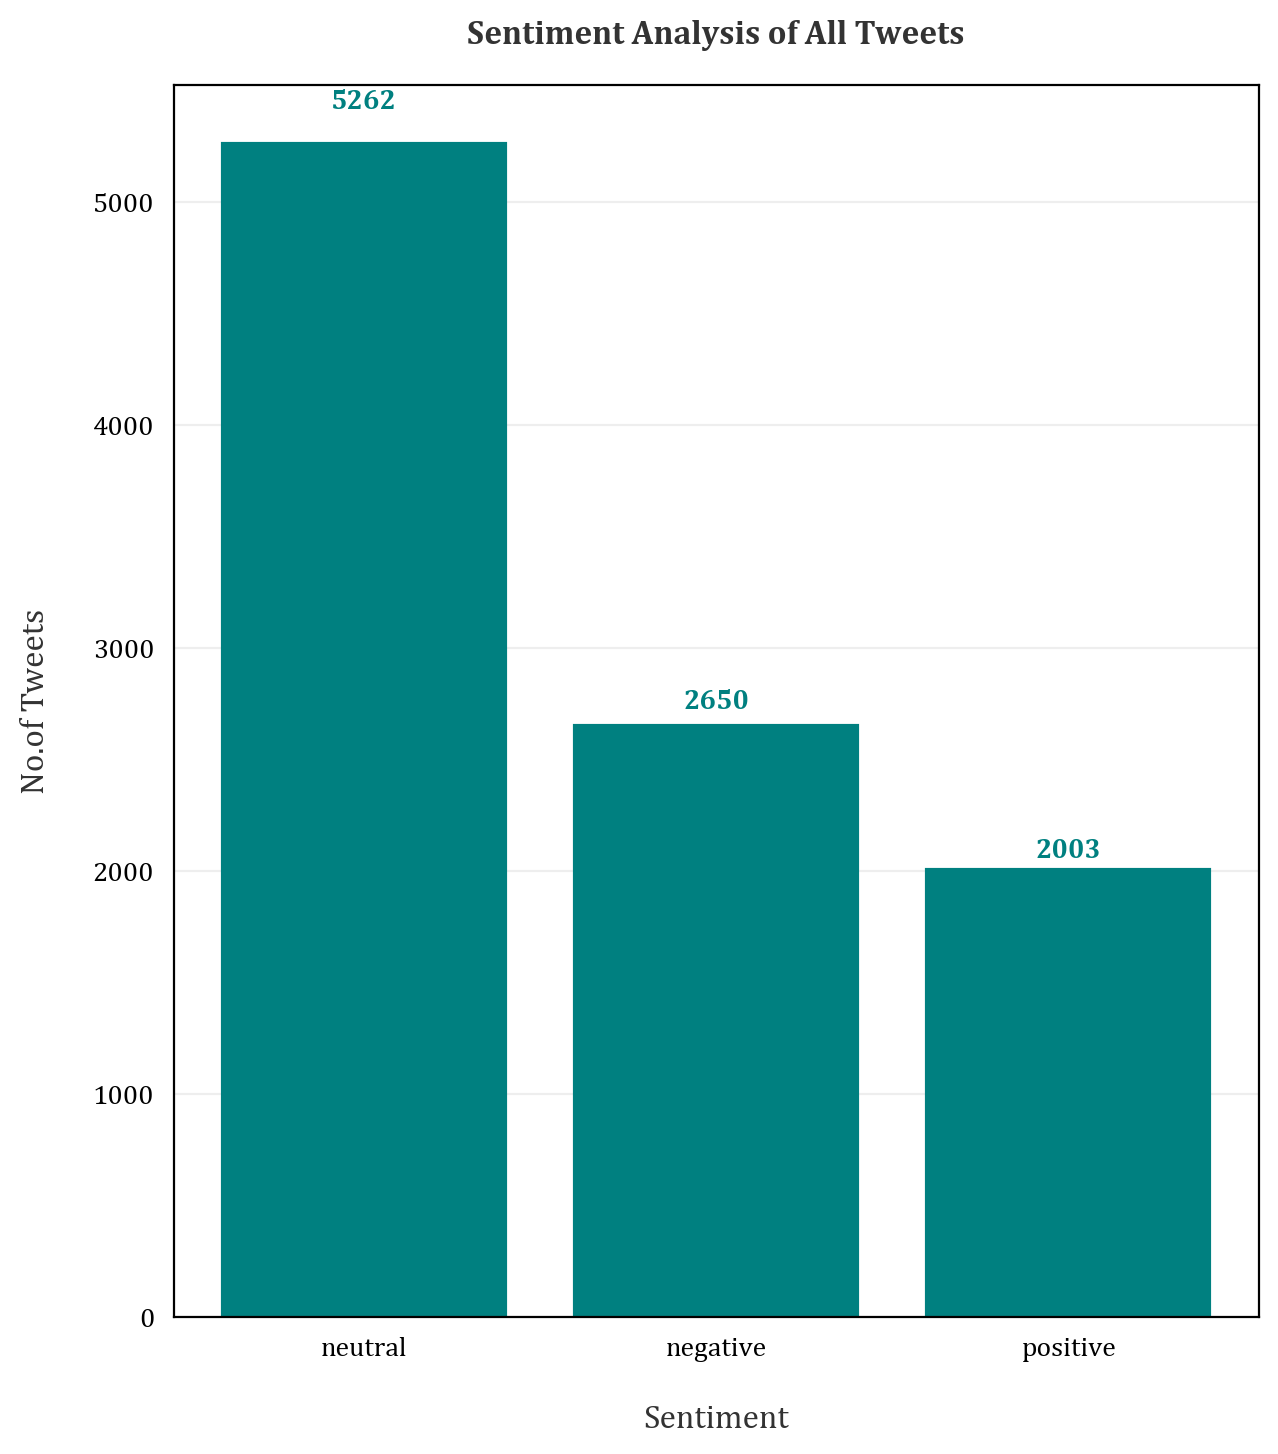

In [122]:
set_matplotlib_formats('retina') #increase quality of charts - crisper image

plt.rcParams['figure.figsize'] = (7,8)

sentiment_labels = sentiment1["Sentiment"].tolist()

fig, ax = plt.subplots()

bars = ax.bar(
    x=np.arange(sentiment.size), #using the original groupby sentiment
    height=sentiment1["Count"],
    #tick_label=sentiment1.index #this is if you want the index of the df as labels
    tick_label=sentiment_labels,
    color="teal",
    edgecolor="teal",
    linewidth=1.5,
)

#axis formatting. this is what shows the box around the barchart
#top 3 are set to TRUE to ensure the box is shown.
#if not, can set to false
ax.spines['top'].set_visible(True) 
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

#rab the color of the bars so we can make the text the same color.
#if not it will just be black.
bar_color = bars[0].get_facecolor()

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.03 * bar.get_height(), #adjust 0.03 for more or less space between bar and value
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold',
      fontfamily="Cambria", #change font of bar values
  )

#add labels and a title. use of `labelpad` and `pad` to add some
#extra space between the text and the tick labels.
ax.set_xticklabels(ax.get_xticklabels(), fontfamily="Cambria", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily="Cambria", fontsize=10)
ax.set_xlabel("Sentiment", labelpad=15, color='#333333',fontfamily="Cambria",fontsize=12)
ax.set_ylabel("No.of Tweets", labelpad=15, color='#333333', fontfamily="Cambria", fontsize=12)
ax.set_title("Sentiment Analysis of All Tweets", pad=15, color='#333333', fontfamily="Cambria",
             weight='bold')

#add a box around the plot
#ensure that the axis formatting is set to TRUE
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

plt.savefig("Multi_Barchart.png")

#https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/

In [123]:
#to generate a word cloud, stopwords and punctuation taken out

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text_wc(text):
    text = text.lower()  #convert text to lowercase
    text = ''.join(ch for ch in text if ch not in punctuation)  #cemove punctuation
    words = text.split()  # Split text into words
    words = [word for word in words if word not in stop_words and len(word) > 2]  #remove stopwords
    return words

twitter["Processed_Text_WC"] = twitter["tweet"].apply(preprocess_text_wc)

Text(0.5, 1.0, 'Word Cloud for Negative Sentiment News')

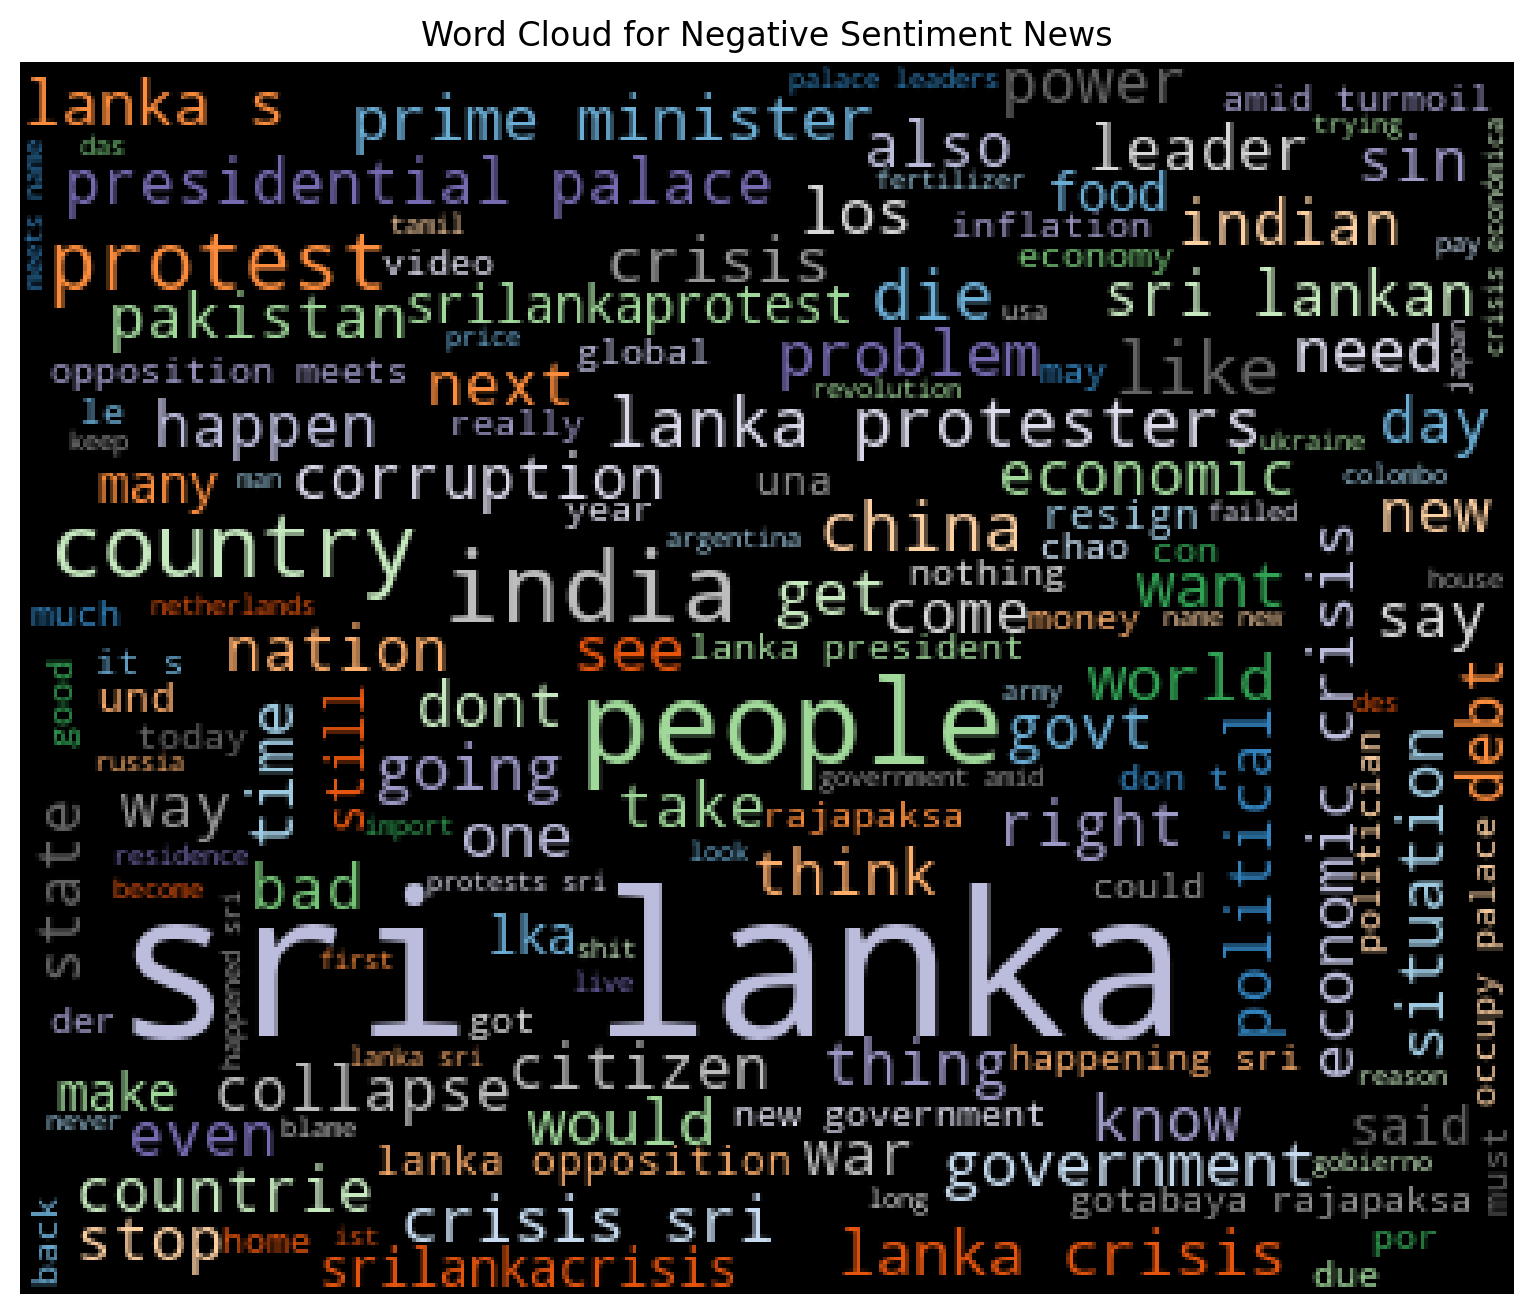

In [124]:
#Draw a wordcloud

#Define a list of stop words
stopwords = ['SriLanka', 'que', 'amp', 'Swamy39', 'swamy39', 'https']

negative_df = twitter[twitter["Sentiment"] == "negative"]

#convert list into a series, then concat into a single string
#drop any NaN values
negative_text = ' '.join(negative_df["Processed_Text_WC"].explode().dropna())

#A function to generate the word cloud from text
def generate_basic_wordcloud(data):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    #plt.title(title, fontsize=13)
    #plt.show()
    
#create a WordCloud with custom colours
background_color = "darkgrey"
colormap = "viridis"
generate_basic_wordcloud(negative_text)

# Plot the WordCloud image
#plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
plt.title('Word Cloud for Negative Sentiment News')
#plt.savefig("WordCloud_Negative")
#plt.show()


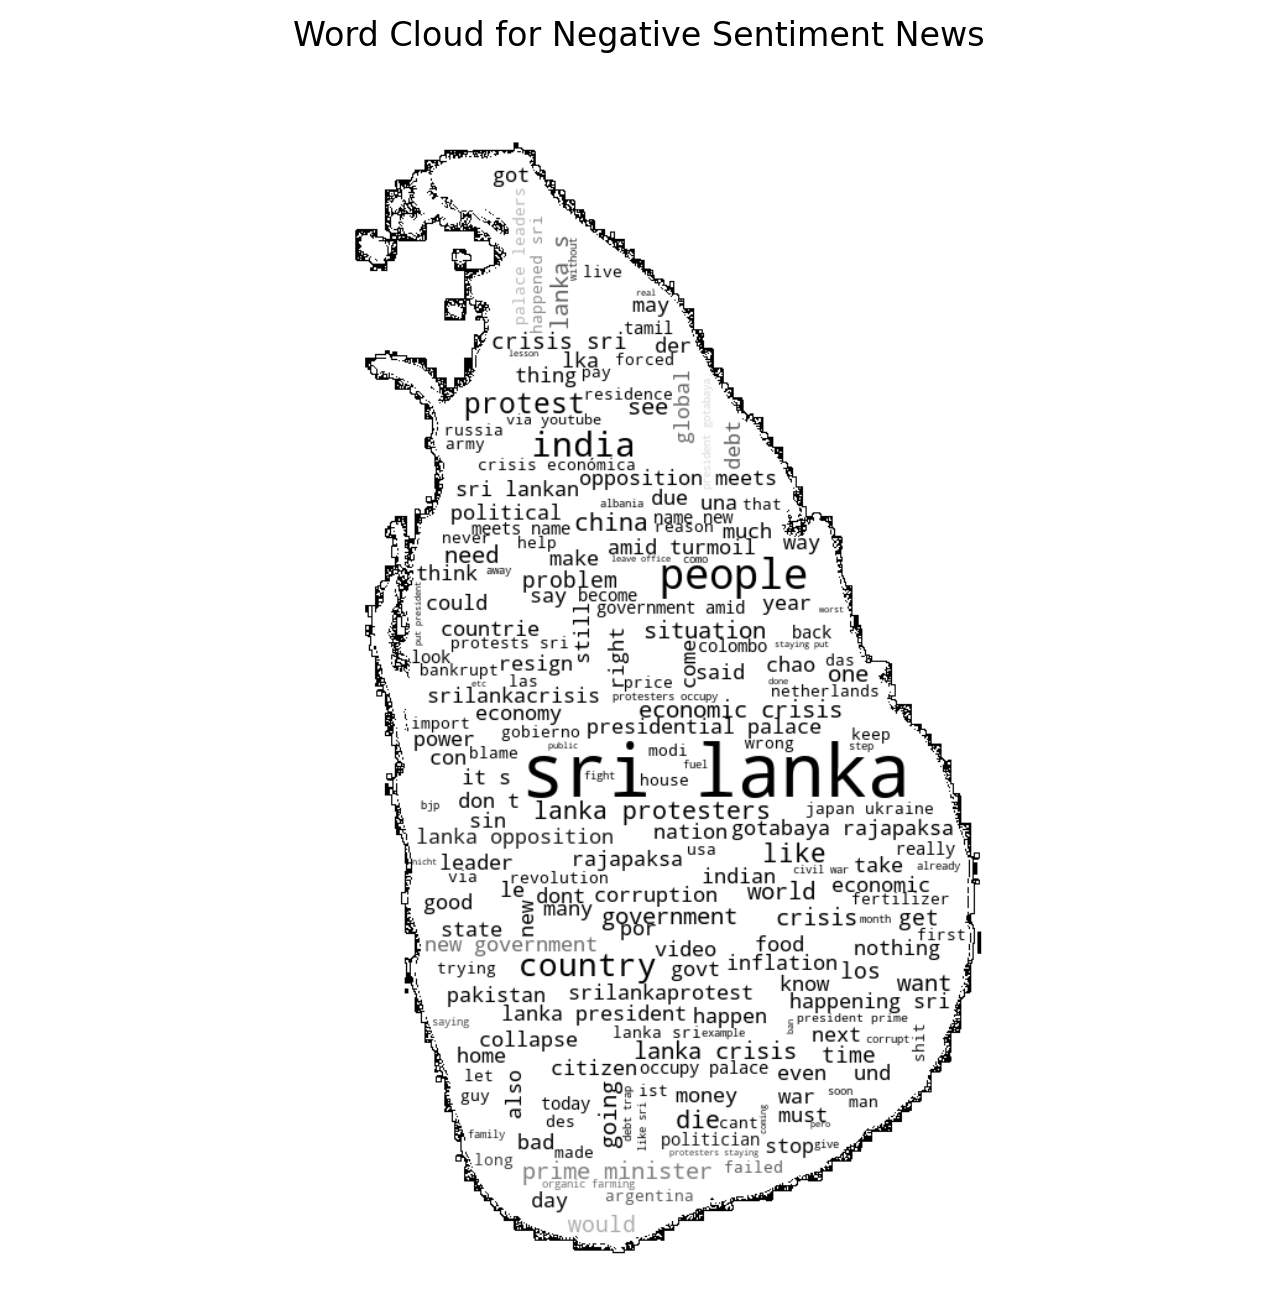

In [125]:
#create an array from the image you want to use as a mask
sl_mask = np.array(Image.open('SL_map.jpg'))

#Define a list of stop words
stopwords = ['SriLanka', 'que', 'amp', 'Swamy39', 'https']

#include a contour
colors = ImageColorGenerator(country_mask) #use single color

#create WC object
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      background_color='white',
                      stopwords=stopwords,
                      #colormap='viridis', 
                      color_func=colors,
                      contour_color="black",
                      contour_width=1,
                      mask=country_mask)

#generate WC from data
wordcloud.generate(negative_text)

plt.figure(figsize=(16,8))
plt.title('Word Cloud for Negative Sentiment News')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()


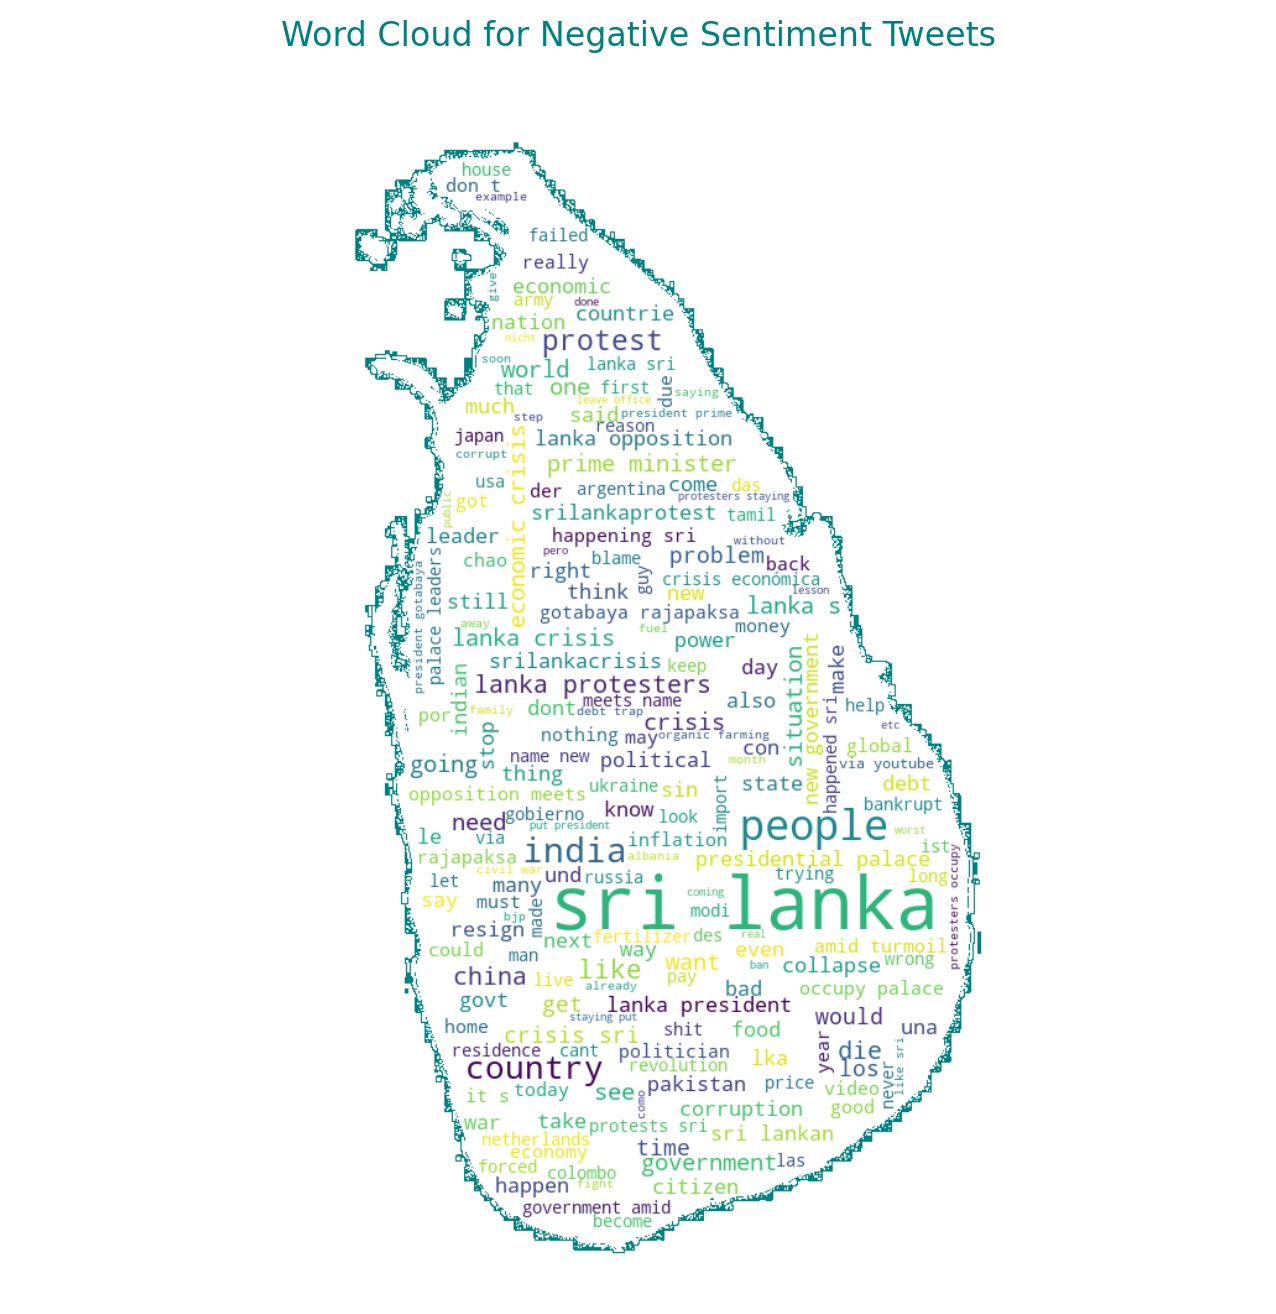

In [126]:
#create an array from the image you want to use as a mask
sl_mask = np.array(Image.open('SL_map.jpg'))

#Define a list of stop words
stopwords = ['SriLanka', 'que', 'amp', 'Swamy39', 'https']

#include a contour
colors = ImageColorGenerator(country_mask) #use single color

#create WC object
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      background_color='white',
                      stopwords=stopwords,
                      colormap='viridis', 
                      #color_func=colors,
                      contour_color="teal",
                      contour_width=1,
                      mask=country_mask)

#generate WC from data
wordcloud.generate(negative_text)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets', color="teal")


plt.savefig("Multi_WC_map.png")

plt.show()


Only Tweets in English

In [127]:
en_tweets = twitter[twitter["language"] == "en"]

#sentiment analysis of english tweets.

#apply SIA on processed_text column
en_tweets["Sentiment Score"] = en_tweets["Processed_Text"].apply(lambda x: sia.polarity_scores(' '.join(x)))

#assign scores (a >= 0.05 positive, <= -0.05  negative)
en_tweets["Score"] = en_tweets["Sentiment Score"].apply(lambda x: x["compound"])

#assign sentiment based on score
en_tweets["Sentiment"] = en_tweets["Score"].apply(lambda score: 'positive' if score >= 0.05 else 'negative' if score <= -0.05 else 'neutral')

#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

C:\Users\sanda\AppData\Local\Temp\ipykernel_16296\1000168204.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_tweets["Sentiment Score"] = en_tweets["Processed_Text"].apply(lambda x: sia.polarity_scores(' '.join(x)))
C:\Users\sanda\AppData\Local\Temp\ipykernel_16296\1000168204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_tweets["Score"] = en_tweets["Sentiment Score"].apply(lambda x: x["compound"])
C:\Users\sanda\AppData\Local\Temp\ipykernel_16296\1000168204.py:12: SettingWithCopyWarning: 
A v

In [128]:
#assessing key sentiments in tweets 
sentiment_en = en_tweets.groupby(["Sentiment"]).size() #calculate sentiment frequency using groupby
sentiment_en1 = sentiment_en.rename("Count").reset_index() #name the column with the counts
sentiment_en1.sort_values(by="Count", ascending=False, inplace=True) #sort column in ascending order
sentiment_en1

#overall neutral sentiment 

,Sentiment,Count
0,negative,2057
2,positive,1772
1,neutral,1167


C:\Users\sanda\AppData\Local\Temp\ipykernel_16296\3734197059.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontfamily="Cambria", fontsize=10)


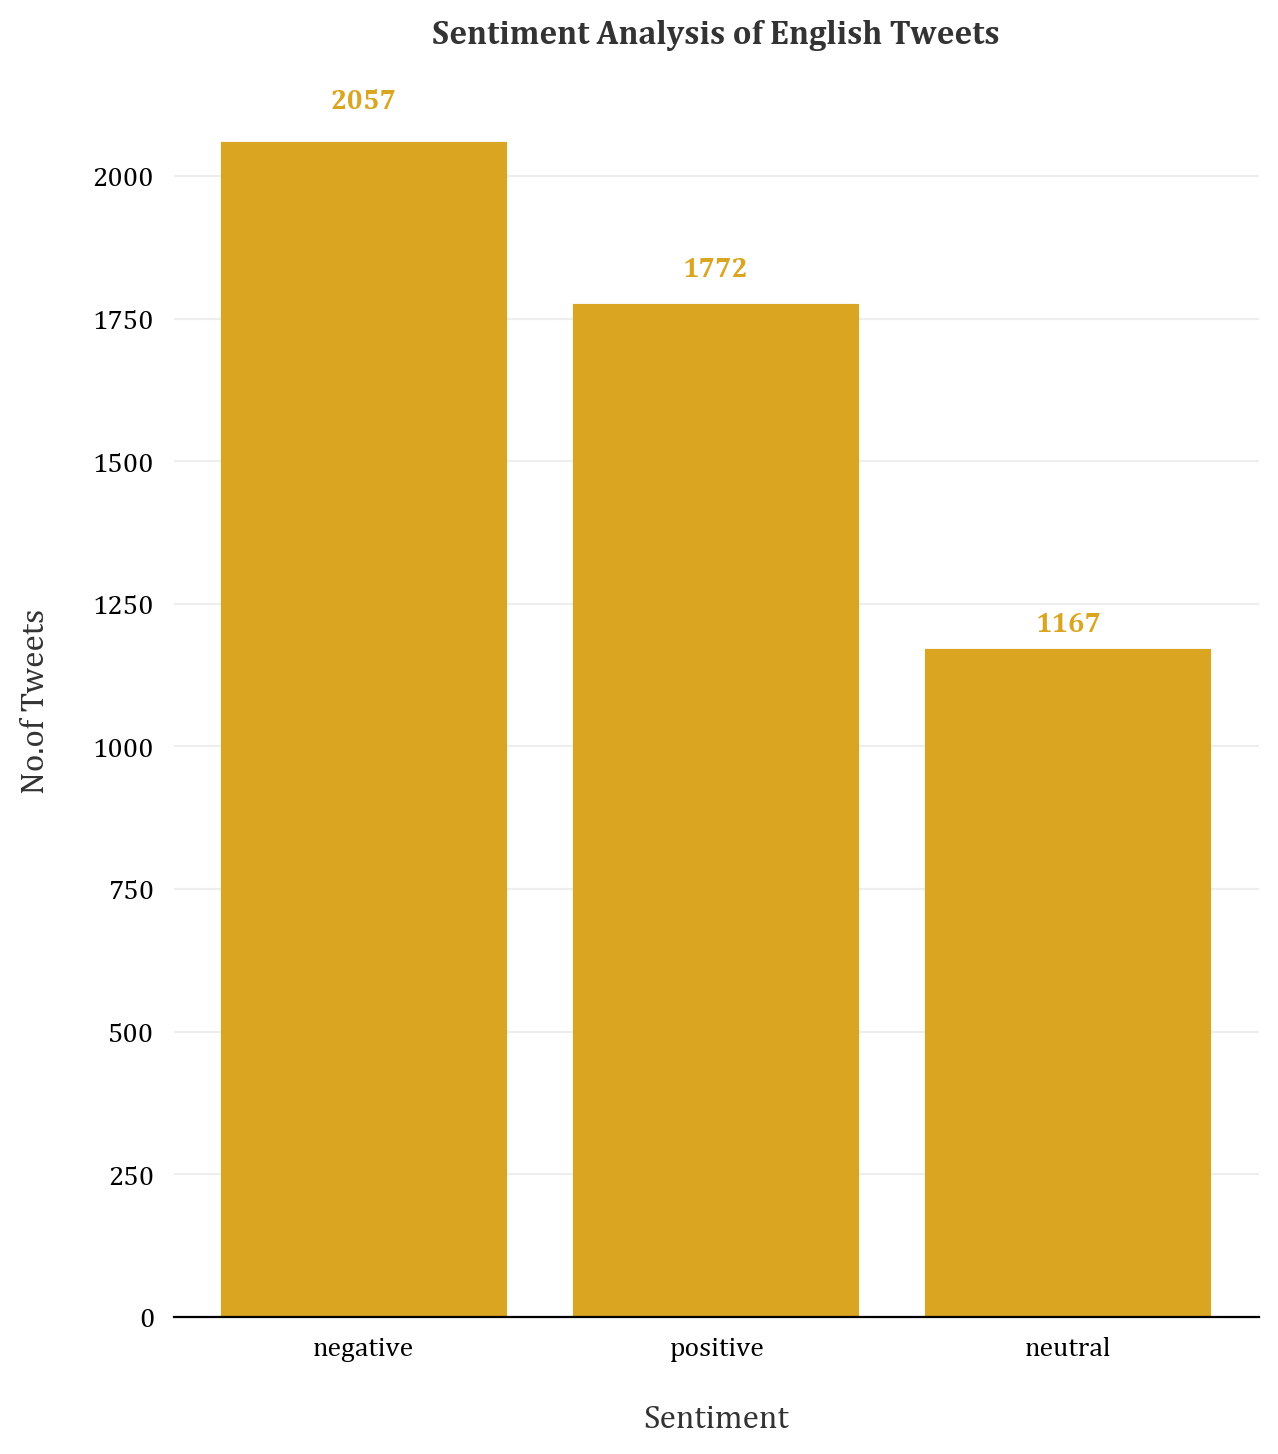

In [131]:
plt.rcParams['figure.figsize'] = (7,8)

sentiment_labels = sentiment_en1["Sentiment"].tolist()

fig, ax = plt.subplots()

bars = ax.bar(
    x=np.arange(sentiment.size), #using the original groupby sentiment
    height=sentiment_en1["Count"],
    #tick_label=sentiment1.index #this is if you want the index of the df as labels
    tick_label=sentiment_labels,
    color="goldenrod",
    edgecolor="goldenrod",
    linewidth=1.5,
)

#axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

#rab the color of the bars so we can make the text the same color.
#if not it will just be black.
bar_color = bars[0].get_facecolor()

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.03 * bar.get_height(), #adjust 0.03 for more or less space between bar and value
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold',
      fontfamily="Cambria", #change font of bar values
  )

#add labels and a title. use of `labelpad` and `pad` to add some
#extra space between the text and the tick labels.
ax.set_xticklabels(ax.get_xticklabels(), fontfamily="Cambria", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily="Cambria", fontsize=10)
ax.set_xlabel("Sentiment", labelpad=15, color='#333333',fontfamily="Cambria",fontsize=12)
ax.set_ylabel("No.of Tweets", labelpad=15, color='#333333', fontfamily="Cambria", fontsize=12)
ax.set_title("Sentiment Analysis of English Tweets", pad=15, color='#333333', fontfamily="Cambria",
             weight='bold')

#add a box around the plot
#ensure that the axis formatting is set to TRUE
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

plt.savefig("Eng_Bar.png")
#https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/

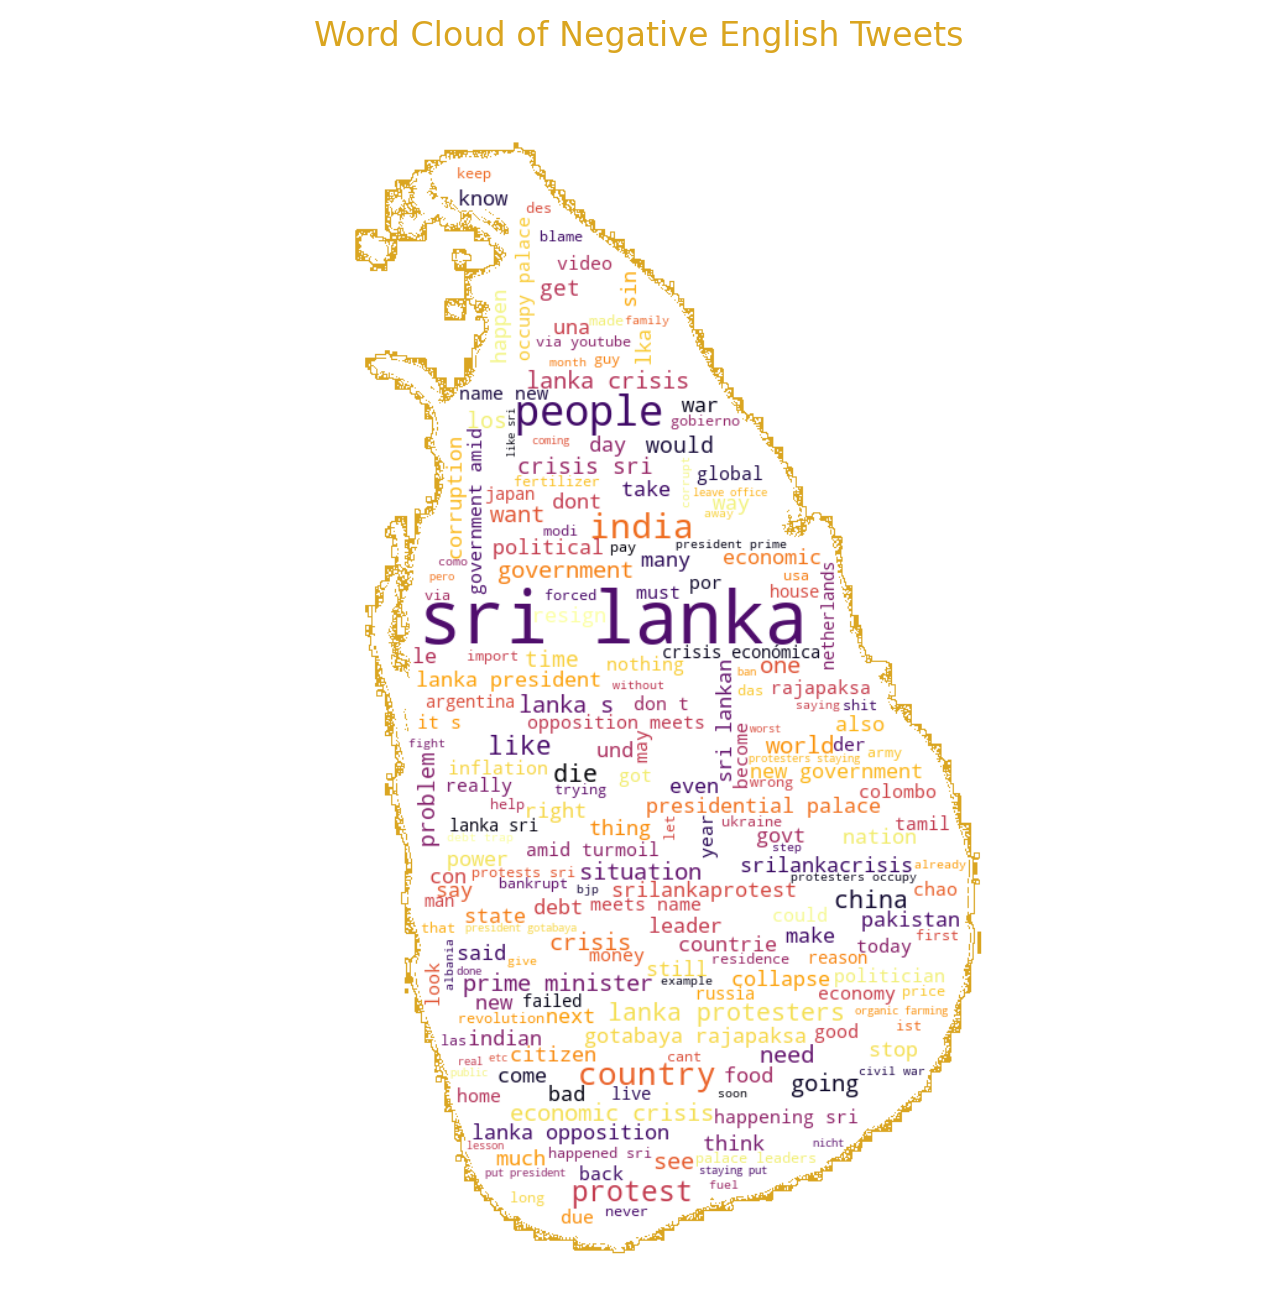

In [130]:
#create an array from the image you want to use as a mask
sl_mask = np.array(Image.open('SL_map.jpg'))

#Define a list of stop words
stopwords = ['SriLanka', 'que', 'amp', 'Swamy39', 'https']

#include a contour
colors = ImageColorGenerator(country_mask) #use single color

#create WC object
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      background_color='white',
                      stopwords=stopwords,
                      colormap='inferno', 
                      #color_func=colors,
                      contour_color="goldenrod",
                      contour_width=1,
                      mask=country_mask)

#generate WC from data
wordcloud.generate(negative_text)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.title("Word Cloud of Negative English Tweets", color="goldenrod")
plt.savefig("Eng_WC_map")
plt.show()
